### Apply Data Storytelling

How do you create a data story? You’ve learned the basics, but the information is probably a bit abstract at this point. Keep in mind that storytelling is an art, so you have to get your imagination bubbling. In this project, you’ll learn some pointers to get those creative juices flowing. In the following sections, we’ll work step-by-step to create your first data story. 


__Steps:__

Ask the following questions and look for the answers using code and plots:

1. Can you count something interesting?
  
 <font color=blue>- Number of adults (over age 19) with heart-related conditions.
 - Of those with heart-related conditions:
    - Age
    - Age of onset of heart-related condition
    - Sex
    - Income
    - Ethnicity
    - Other health-related diagnoses and age of onset (diabetes, thyroid)
    - Depression score
    - Lab values
    - Anthropometric data (height, weight, % body fat)
    - Number of overnight hospital stays in the last year (if any)
    - Food security issues
    - Health insurance</font>
    
    
2. Can you find trends (e.g. high, low, increasing, decreasing, anomalies)?

3. Can you make a bar plot or a histogram?

4. Can you compare two related quantities?

5. Can you make a scatterplot?

6. Can you make a time-series plot?

Looking at the plots, what are some insights you can make? 

Do you see any correlations? 

Is there a hypothesis you’d like to investigate further? 

What other questions do the insights lead you to ask?


Now that you’ve asked questions, hopefully you’ve found some interesting insights. Is there a narrative or a way of presenting the insights using text and plots that tells a compelling story? 

What are some other trends/relationships you think will make the story more complete?

Submission: Submit links to a GitHub repository containing a Jupyter Notebook. The Notebook should contain:
The questions you asked
The trends you investigated
The resulting visualizations and conclusions
You will be evaluated using this rubric.

These results will go into your final portfolio and presentation. Organize your work as you go along to make it easier to compile later. Create slides and/or a presentation (.ppt) about your emerging data story.   
 
In case the dataset is too large to commit to GitHub, please include a link to the dataset inside the Jupyter Notebook.

Discuss these results with your mentor at the next call. if you’re having trouble with your code for this unit, you can reach out to your course TA for help by emailing projects@springboard.com, or post questions in the community forum.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### We have identified 16 databases of interest from the 2015-2016 NHANES dataset: acculturation, body measurements, demographics, diabetes, depression, dexa (body composition), food security, hospitalization, health insurance, income,  medical conditions, and laboratory test results (fasting glucose, HDL, Triglycerides and LDL, Total Cholesterol, and Hemoglobin A1C). 


In [2]:
#Reading SAS data files into a pandas dataframes

acq = pd.read_sas('NHANES/ACQ_I_acculturation.XPT')
bmx = pd.read_sas('NHANES/BMX_I_body_measures.xpt')
demo = pd.read_sas('NHANES/DEMO_I_demographics.XPT')
diq = pd.read_sas('NHANES/DIQ_I_diabetes.xpt')
dpq = pd.read_sas('NHANES/DPQ_I_depression.xpt')
dxx = pd.read_sas('NHANES/DXX_I_dexa.xpt')
fsq = pd.read_sas('NHANES/FSQ_I_food_security.xpt')
huq = pd.read_sas('NHANES/HUQ_I_hospitalization.XPT')
hiq = pd.read_sas('NHANES/HIQ_I_health_insurance.xpt')
inq = pd.read_sas('NHANES/INQ_I_income.xpt')
mcq = pd.read_sas('NHANES/MCQ_I_medical_conditions.XPT')
glu = pd.read_sas('NHANES/GLU_I_glucose.XPT')
hdl = pd.read_sas('NHANES/HDL_I_hdl.XPT')
ldltg = pd.read_sas('NHANES/TRIGLY_I_ldl_tg.XPT')
tc = pd.read_sas('NHANES/TCHOL_I_tc.XPT')
hgba1c = pd.read_sas('NHANES/GHB_I_hgba1c.XPT')



#Merging the 15 dataframes together into one large dataframe
nhanes = acq.merge(bmx, on='SEQN', how='outer') \
.merge(demo, on='SEQN', how='outer') \
.merge(diq, on='SEQN', how='outer').merge(dpq, on='SEQN', how ='outer') \
.merge(dxx, on='SEQN', how='outer').merge(fsq, on='SEQN', how='outer') \
.merge(huq, on='SEQN', how='outer').merge(hiq, on='SEQN', how='outer') \
.merge(inq, on='SEQN', how='outer').merge(mcq, on='SEQN', how='outer')\
.merge(glu, on='SEQN', how='outer').merge(hdl, on='SEQN', how='outer')\
.merge(ldltg, on='SEQN', how='outer').merge(tc, on='SEQN', how='outer')\
.merge(hgba1c, on='SEQN', how='outer')

#selecting the columns to include in the new dataframe
nhanes = nhanes[['SEQN','RIDAGEYR', 'RIAGENDR', 'RIDRETH3', 'ACD040', 'ACD011A', 'ACD110', 'BMXBMI', \
                  'DIQ010', 'DID040', 'DIQ160', 'DPQ010','DPQ020','DPQ030','DPQ040','DPQ050','DPQ060',\
                  'DPQ070','DPQ080','DPQ090','DPQ100', 'DXDTOPF', 'FSD032B', 'IND235', 'MCQ160B', 'MCQ180B',\
                  'MCQ160C', 'MCQ180C','MCQ160D', 'MCQ180D', 'MCQ160E', 'MCQ180E', 'MCQ160F', 'MCQ180F', 'HUD080',\
                'LBXGLU','LBDHDD','LBXTR', 'LBDLDL','LBXTC', 'LBXGH' ]]

#Confirming pandas dataframe has been created
print(type(nhanes))


<class 'pandas.core.frame.DataFrame'>


In [3]:
#Renaming the columns of the dataframe, so that it is easier to understand the variables of interest.

nhanes.columns = ['seqn', 'age', 'gender', 'ethnicity', 'lang_hisp', 'lang_nhb_nhw', 'lang_asian', 'bmi', \
                   'diabetic', 'age_diabetic', 'prediabetic', 'depr1', 'depr2', 'depr3', 'depr4', 'depr5', 'depr6',\
                  'depr7', 'depr8', 'depr9', 'depr10', 'bodyfatpct', 'foodsec', 'income', 'chf', 'chf_age', \
                  'chd', 'chd_age', 'angina', 'angina_age', 'heartattack', 'heartattack_age','stroke', 'stroke_age', 'numhosp',\
                  'glucose', 'hdl','tg', 'ldl', 'tchol','hgba1c']

# Setting index of dataset as the study participant identification number
nhanes.set_index('seqn')



,age,gender,ethnicity,lang_hisp,lang_nhb_nhw,lang_asian,bmi,diabetic,age_diabetic,prediabetic,...,heartattack_age,stroke,stroke_age,numhosp,glucose,hdl,tg,ldl,tchol,hgba1c
seqn,,,,,,,,,,,,,,,,,,,,,
83732.0,6.200000e+01,1.0,3.0,NaN,1.0,NaN,27.8,1.0,46.0,NaN,...,NaN,2.0,NaN,NaN,NaN,46.0,NaN,NaN,173.0,7.0
83733.0,5.300000e+01,1.0,3.0,NaN,NaN,NaN,30.8,2.0,NaN,2.0,...,NaN,2.0,NaN,NaN,101.0,63.0,147.0,173.0,265.0,5.5
83734.0,7.800000e+01,1.0,3.0,NaN,1.0,NaN,28.8,1.0,52.0,NaN,...,58.0,2.0,NaN,NaN,84.0,30.0,269.0,145.0,229.0,5.8
83735.0,5.600000e+01,2.0,3.0,NaN,1.0,NaN,42.4,2.0,NaN,1.0,...,NaN,2.0,NaN,NaN,NaN,61.0,NaN,NaN,174.0,5.6
83736.0,4.200000e+01,2.0,4.0,NaN,1.0,NaN,20.3,2.0,NaN,2.0,...,NaN,2.0,NaN,NaN,84.0,53.0,47.0,142.0,204.0,5.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92581.0,1.000000e+00,2.0,3.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92963.0,5.397605e-79,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
93225.0,1.000000e+00,2.0,4.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
print(nhanes.shape)
print(nhanes.info())
print(nhanes.head(), nhanes.tail())




(9971, 41)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 9971 entries, 0 to 9970
Data columns (total 41 columns):
seqn               9971 non-null float64
age                9971 non-null float64
gender             9971 non-null float64
ethnicity          9971 non-null float64
lang_hisp          2882 non-null float64
lang_nhb_nhw       4964 non-null float64
lang_asian         984 non-null float64
bmi                8756 non-null float64
diabetic           9575 non-null float64
age_diabetic       853 non-null float64
prediabetic        6045 non-null float64
depr1              5164 non-null float64
depr2              5164 non-null float64
depr3              5164 non-null float64
depr4              5162 non-null float64
depr5              5162 non-null float64
depr6              5162 non-null float64
depr7              5161 non-null float64
depr8              5161 non-null float64
depr9              5161 non-null float64
depr10             3579 non-null float64
bodyfatpct         4598

In [5]:
# Replacing values in the questionnaires that had responses of either 'refused'(77777 and 777), or 
#'Don't Know' (99999 and 999) with 'NaN' 
cols = ['seqn', 'age', 'gender', 'ethnicity', 'lang_hisp', 'lang_nhb_nhw', 'lang_asian', 'bmi', \
                   'diabetic', 'age_diabetic', 'prediabetic', 'depr1', 'depr2', 'depr3', 'depr4', 'depr5', 'depr6',\
                  'depr7', 'depr8', 'depr9', 'depr10', 'bodyfatpct', 'foodsec', 'income', 'chf', 'chf_age', \
                  'chd', 'chd_age', 'angina', 'angina_age', 'heartattack', 'heartattack_age','stroke', 'stroke_age', 'numhosp',\
                  'glucose', 'hdl','tg', 'ldl', 'tchol','hgba1c']
nhanes[cols] = nhanes[cols].replace(['99999', '77777','777', '999', 99999, 77777, 777, 999],np.nan)

# Making 'gender' column more understandable
nhanes.gender = nhanes.gender.replace([1],'Male')
nhanes.gender = nhanes.gender.replace([2], 'Female')

# Since some of the participants were infants under 12 months, their ages were calculated as less than 1, 
# resulting in exponential values. To fix this, we will round the ages
nhanes.age = nhanes['age'].round(decimals=0)
nhanes.age.value_counts(dropna=False).sort_values(ascending=True)

79.0     37
76.0     46
77.0     48
78.0     49
74.0     56
       ... 
7.0     238
2.0     291
1.0     293
80.0    376
0.0     396
Name: age, Length: 81, dtype: int64

In [6]:
print(nhanes.head(), nhanes.tail())

      seqn   age  gender  ethnicity  lang_hisp  lang_nhb_nhw  lang_asian  \
0  83732.0  62.0    Male        3.0        NaN           1.0         NaN   
1  83733.0  53.0    Male        3.0        NaN           NaN         NaN   
2  83734.0  78.0    Male        3.0        NaN           1.0         NaN   
3  83735.0  56.0  Female        3.0        NaN           1.0         NaN   
4  83736.0  42.0  Female        4.0        NaN           1.0         NaN   

    bmi  diabetic  age_diabetic  ...  heartattack_age  stroke  stroke_age  \
0  27.8       1.0          46.0  ...              NaN     2.0         NaN   
1  30.8       2.0           NaN  ...              NaN     2.0         NaN   
2  28.8       1.0          52.0  ...             58.0     2.0         NaN   
3  42.4       2.0           NaN  ...              NaN     2.0         NaN   
4  20.3       2.0           NaN  ...              NaN     2.0         NaN   

   numhosp  glucose   hdl     tg    ldl  tchol  hgba1c  
0      NaN      NaN  46

In [7]:
# Looking at frequency counts for each of the columns
#column names: 'seqn', 'age', 'gender', 'ethnicity', 'lang_hisp', 'lang_nhb_nhw', 'lang_asian', 'bmi', \
#                   'diabetic', 'age_diabetic', 'prediabetic', 'depr1', 'depr2', 'depr3', 'depr4', 'depr5', \
#                  'depr6', 'depr7', 'depr8', 'depr9', 'depr10', 'bodyfatpct', 'foodsec', 'income', \
#                'chf', 'chf_age', 'chd', 'chd_age', 'angina', 'angina_age', 'heartattack', 'heartattack_age', \
#                'stroke', 'stroke_age', 'numhosp']

print('age\n', nhanes.age.value_counts(dropna=False),'\n')
print('gender\n', nhanes.gender.value_counts(dropna=False),'\n')
print('ethnicity\n', nhanes.ethnicity.value_counts(dropna=False),'\n')
print('hispanic home language\n', nhanes.lang_hisp.value_counts(dropna=False),'\n')
print('non-hispanic black and non-hispanic white home language\n', nhanes.lang_nhb_nhw.value_counts(dropna=False),'\n')
print('non-hispanic asian home language\n', nhanes.lang_asian.value_counts(dropna=False),'\n')
print('body mass index\n', nhanes.bmi.value_counts(dropna=False),'\n')
print('diabetic\n', nhanes.diabetic.value_counts(dropna=False),'\n')
print('diabetes_age\n', nhanes.age_diabetic.value_counts(dropna=False),'\n')
print('prediabetes\n', nhanes.prediabetic.value_counts(dropna=False),'\n')
print('depression scores\n', nhanes.depr1.value_counts(dropna=False),'\n')
print(nhanes.depr2.value_counts(dropna=False),'\n')
print(nhanes.depr3.value_counts(dropna=False),'\n')
print(nhanes.depr4.value_counts(dropna=False),'\n')
print(nhanes.depr5.value_counts(dropna=False),'\n')
print(nhanes.depr6.value_counts(dropna=False),'\n')
print(nhanes.depr7.value_counts(dropna=False),'\n')
print(nhanes.depr8.value_counts(dropna=False),'\n')
print(nhanes.depr9.value_counts(dropna=False),'\n')
print(nhanes.depr10.value_counts(dropna=False),'\n')
print('bodyfat percentage\n', nhanes.bodyfatpct.value_counts(dropna=False),'\n')
print('food security\n', nhanes.foodsec.value_counts(dropna=False),'\n')
print('household income\n', nhanes.income.value_counts(dropna=False),'\n')
print('congestive heart failure (chf)\n', nhanes.chf.value_counts(dropna=False),'\n')
print('chf age\n', nhanes.chf_age.value_counts(dropna=False),'\n')
print('coronary heart disease (chd)\n', nhanes.chd.value_counts(dropna=False),'\n')
print('chd age\n', nhanes.chd_age.value_counts(dropna=False),'\n')
print('angina\n', nhanes.angina.value_counts(dropna=False),'\n')
print('angina age\n', nhanes.angina_age.value_counts(dropna=False),'\n')
print('heart attack\n', nhanes.heartattack.value_counts(dropna=False),'\n')
print('heart attack age\n', nhanes.heartattack_age.value_counts(dropna=False),'\n')
print('stroke\n', nhanes.stroke.value_counts(dropna=False),'\n')
print('stroke age\n', nhanes.stroke_age.value_counts(dropna=False),'\n')
print('number of hospitalizations\n', nhanes.numhosp.value_counts(dropna=False),'\n')
print('fasting glucose\n', nhanes.glucose.value_counts(dropna=False),'\n')
print('hdl\n', nhanes.hdl.value_counts(dropna=False),'\n')
print('triglycerides\n', nhanes.tg.value_counts(dropna=False),'\n')
print('ldl\n', nhanes.ldl.value_counts(dropna=False),'\n')
print('total cholesterol\n', nhanes.tchol.value_counts(dropna=False),'\n')
print('HgbA1c\n', nhanes.hgba1c.value_counts(dropna=False),'\n')


'glucose', 'hdl','tg', 'ldl', 'tchol','hgba1c'






age
 0.0     396
80.0    376
1.0     293
2.0     291
7.0     238
       ... 
74.0     56
78.0     49
77.0     48
76.0     46
79.0     37
Name: age, Length: 81, dtype: int64 

gender
 Female    5079
Male      4892
Name: gender, dtype: int64 

ethnicity
 3.0    3066
4.0    2129
1.0    1921
2.0    1308
6.0    1042
7.0     505
Name: ethnicity, dtype: int64 

hispanic home language
 NaN    7089
1.0     767
5.0     588
4.0     554
3.0     533
2.0     438
9.0       2
Name: lang_hisp, dtype: int64 

non-hispanic black and non-hispanic white home language
 NaN     5007
1.0     4963
99.0       1
Name: lang_nhb_nhw, dtype: int64 

non-hispanic asian home language
 NaN    8987
1.0     412
5.0     241
4.0     137
2.0     101
3.0      90
9.0       3
Name: lang_asian, dtype: int64 

body mass index
 NaN     1215
29.1      58
26.8      55
26.5      54
15.7      54
        ... 
62.7       1
55.5       1
50.7       1
45.8       1
55.1       1
Name: bmi, Length: 430, dtype: int64 

diabetic
 2.0    8568


('glucose', 'hdl', 'tg', 'ldl', 'tchol', 'hgba1c')

In [8]:
nhanes.describe()

,seqn,age,ethnicity,lang_hisp,lang_nhb_nhw,lang_asian,bmi,diabetic,age_diabetic,prediabetic,...,heartattack_age,stroke,stroke_age,numhosp,glucose,hdl,tg,ldl,tchol,hgba1c
count,9971.000000,9971.000000,9971.000000,2882.000000,4964.000000,984.000000,8756.000000,9575.000000,841.000000,6045.000000,...,246.000000,5719.000000,205.000000,868.000000,2972.000000,7256.000000,2723.000000,2699.000000,7256.000000,6326.000000
mean,88717.000000,31.899408,3.213118,2.920194,1.019742,2.707317,26.016697,1.928877,49.195006,1.927874,...,56.662602,1.969575,55.751220,1.473502,110.609017,54.400910,106.603746,107.715080,180.256615,5.746364
std,2878.524101,24.768829,1.679606,1.498078,1.390946,1.709797,7.963873,0.346664,26.073979,0.410918,...,12.620197,0.280130,17.013304,0.962018,38.605914,16.618883,91.369146,35.887167,41.337081,1.104387
min,83732.000000,0.000000,1.000000,1.000000,1.000000,1.000000,11.500000,1.000000,2.000000,1.000000,...,20.000000,1.000000,2.000000,1.000000,21.000000,6.000000,14.000000,23.000000,77.000000,3.800000
25%,86224.500000,9.000000,2.000000,1.000000,1.000000,1.000000,19.900000,2.000000,40.000000,2.000000,...,48.000000,2.000000,47.000000,1.000000,94.000000,43.000000,57.000000,81.000000,150.000000,5.200000
50%,88717.000000,27.000000,3.000000,3.000000,1.000000,2.000000,25.200000,2.000000,50.000000,2.000000,...,57.000000,2.000000,58.000000,1.000000,101.000000,52.000000,85.000000,104.000000,176.000000,5.500000
75%,91209.500000,53.000000,4.000000,4.000000,1.000000,4.000000,30.600000,2.000000,60.000000,2.000000,...,66.000000,2.000000,68.000000,2.000000,111.000000,64.000000,130.000000,129.000000,204.000000,5.800000
max,93702.000000,80.000000,7.000000,9.000000,99.000000,9.000000,67.300000,9.000000,666.000000,9.000000,...,80.000000,9.000000,80.000000,6.000000,479.000000,226.000000,2141.000000,277.000000,545.000000,17.000000


In [9]:
#Note that age onset for diabetes is off. To fix this:
nhanes.age_diabetic = nhanes.age_diabetic.replace([666, '666'],1)

#Also note that age is off for chf_age (because some of the participants had CHF as a baby, and age was listed in months)
nhanes.chf_age = nhanes.chf_age.round(decimals=0)

#depression screening answers are being expressed as exponents. To fix:
nhanes[['depr1','depr2','depr3','depr4','depr5','depr6','depr7','depr8', 'depr9', 'depr10']]\
    = nhanes[['depr1','depr2','depr3','depr4','depr5','depr6','depr7','depr8', 'depr9', 'depr10']].round(decimals=0)


nhanes.describe()

,seqn,age,ethnicity,lang_hisp,lang_nhb_nhw,lang_asian,bmi,diabetic,age_diabetic,prediabetic,...,heartattack_age,stroke,stroke_age,numhosp,glucose,hdl,tg,ldl,tchol,hgba1c
count,9971.000000,9971.000000,9971.000000,2882.000000,4964.000000,984.000000,8756.000000,9575.000000,841.000000,6045.000000,...,246.000000,5719.000000,205.000000,868.000000,2972.000000,7256.000000,2723.000000,2699.000000,7256.000000,6326.000000
mean,88717.000000,31.899408,3.213118,2.920194,1.019742,2.707317,26.016697,1.928877,48.404281,1.927874,...,56.662602,1.969575,55.751220,1.473502,110.609017,54.400910,106.603746,107.715080,180.256615,5.746364
std,2878.524101,24.768829,1.679606,1.498078,1.390946,1.709797,7.963873,0.346664,15.135285,0.410918,...,12.620197,0.280130,17.013304,0.962018,38.605914,16.618883,91.369146,35.887167,41.337081,1.104387
min,83732.000000,0.000000,1.000000,1.000000,1.000000,1.000000,11.500000,1.000000,1.000000,1.000000,...,20.000000,1.000000,2.000000,1.000000,21.000000,6.000000,14.000000,23.000000,77.000000,3.800000
25%,86224.500000,9.000000,2.000000,1.000000,1.000000,1.000000,19.900000,2.000000,40.000000,2.000000,...,48.000000,2.000000,47.000000,1.000000,94.000000,43.000000,57.000000,81.000000,150.000000,5.200000
50%,88717.000000,27.000000,3.000000,3.000000,1.000000,2.000000,25.200000,2.000000,50.000000,2.000000,...,57.000000,2.000000,58.000000,1.000000,101.000000,52.000000,85.000000,104.000000,176.000000,5.500000
75%,91209.500000,53.000000,4.000000,4.000000,1.000000,4.000000,30.600000,2.000000,60.000000,2.000000,...,66.000000,2.000000,68.000000,2.000000,111.000000,64.000000,130.000000,129.000000,204.000000,5.800000
max,93702.000000,80.000000,7.000000,9.000000,99.000000,9.000000,67.300000,9.000000,80.000000,9.000000,...,80.000000,9.000000,80.000000,6.000000,479.000000,226.000000,2141.000000,277.000000,545.000000,17.000000


In [10]:
#was unable to see all columns. To fix this:
pd.set_option('display.max_columns', 50)


In [11]:
#viewing summary statistics
nhanes.describe()


,seqn,age,ethnicity,lang_hisp,lang_nhb_nhw,lang_asian,bmi,diabetic,age_diabetic,prediabetic,depr1,depr2,depr3,depr4,depr5,depr6,depr7,depr8,depr9,depr10,bodyfatpct,foodsec,income,chf,chf_age,chd,chd_age,angina,angina_age,heartattack,heartattack_age,stroke,stroke_age,numhosp,glucose,hdl,tg,ldl,tchol,hgba1c
count,9971.000000,9971.000000,9971.000000,2882.000000,4964.000000,984.000000,8756.000000,9575.000000,841.000000,6045.000000,5164.000000,5164.000000,5164.000000,5162.000000,5162.000000,5162.000000,5161.000000,5161.000000,5161.000000,3579.000000,4598.000000,9649.000000,9420.000000,5719.000000,209.000000,5719.000000,239.000000,5719.000000,131.000000,5719.000000,246.000000,5719.000000,205.000000,868.000000,2972.000000,7256.000000,2723.000000,2699.000000,7256.000000,6326.000000
mean,88717.000000,31.899408,3.213118,2.920194,1.019742,2.707317,26.016697,1.928877,48.404281,1.927874,0.422541,0.346631,0.617157,0.783611,0.407400,0.248741,0.258865,0.168378,0.062779,0.290305,31.852175,2.629184,16.003503,1.976045,57.143541,1.989159,57.029289,1.998426,49.358779,1.967127,56.662602,1.969575,55.751220,1.473502,110.609017,54.400910,106.603746,107.715080,180.256615,5.746364
std,2878.524101,24.768829,1.679606,1.498078,1.390946,1.709797,7.963873,0.346664,15.135285,0.410918,0.872461,0.719062,0.946989,0.931202,0.817394,0.661830,0.686266,0.578470,0.397585,0.616834,8.694065,0.670946,26.923206,0.362099,14.227495,0.515131,12.925903,0.416305,13.016007,0.346324,12.620197,0.280130,17.013304,0.962018,38.605914,16.618883,91.369146,35.887167,41.337081,1.104387
min,83732.000000,0.000000,1.000000,1.000000,1.000000,1.000000,11.500000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.700000,1.000000,1.000000,1.000000,0.000000,1.000000,10.000000,1.000000,10.000000,1.000000,20.000000,1.000000,2.000000,1.000000,21.000000,6.000000,14.000000,23.000000,77.000000,3.800000
25%,86224.500000,9.000000,2.000000,1.000000,1.000000,1.000000,19.900000,2.000000,40.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.300000,2.000000,5.000000,2.000000,48.000000,2.000000,49.000000,2.000000,41.000000,2.000000,48.000000,2.000000,47.000000,1.000000,94.000000,43.000000,57.000000,81.000000,150.000000,5.200000
50%,88717.000000,27.000000,3.000000,3.000000,1.000000,2.000000,25.200000,2.000000,50.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,31.600000,3.000000,7.000000,2.000000,58.000000,2.000000,57.000000,2.000000,50.000000,2.000000,57.000000,2.000000,58.000000,1.000000,101.000000,52.000000,85.000000,104.000000,176.000000,5.500000
75%,91209.500000,53.000000,4.000000,4.000000,1.000000,4.000000,30.600000,2.000000,60.000000,2.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,38.800000,3.000000,11.000000,2.000000,68.000000,2.000000,66.000000,2.000000,58.000000,2.000000,66.000000,2.000000,68.000000,2.000000,111.000000,64.000000,130.000000,129.000000,204.000000,5.800000
max,93702.000000,80.000000,7.000000,9.000000,99.000000,9.000000,67.300000,9.000000,80.000000,9.000000,9.000000,7.000000,9.000000,7.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,54.700000,9.000000,99.000000,9.000000,80.000000,9.000000,80.000000,9.000000,80.000000,9.000000,80.000000,9.000000,80.000000,6.000000,479.000000,226.000000,2141.000000,277.000000,545.000000,17.000000


In [12]:
#summary statistics of only numeric data of interest
nhanes[['age', 'bmi', 'age_diabetic', 'bodyfatpct', 'chf_age', 'chd_age',\
        'angina_age', 'heartattack_age','stroke_age','numhosp', 'glucose', \
        'hdl', 'tg','ldl', 'tchol', 'hgba1c']].describe()



,age,bmi,age_diabetic,bodyfatpct,chf_age,chd_age,angina_age,heartattack_age,stroke_age,numhosp,glucose,hdl,tg,ldl,tchol,hgba1c
count,9971.000000,8756.000000,841.000000,4598.000000,209.000000,239.000000,131.000000,246.000000,205.000000,868.000000,2972.000000,7256.000000,2723.000000,2699.000000,7256.000000,6326.000000
mean,31.899408,26.016697,48.404281,31.852175,57.143541,57.029289,49.358779,56.662602,55.751220,1.473502,110.609017,54.400910,106.603746,107.715080,180.256615,5.746364
std,24.768829,7.963873,15.135285,8.694065,14.227495,12.925903,13.016007,12.620197,17.013304,0.962018,38.605914,16.618883,91.369146,35.887167,41.337081,1.104387
min,0.000000,11.500000,1.000000,11.700000,0.000000,10.000000,10.000000,20.000000,2.000000,1.000000,21.000000,6.000000,14.000000,23.000000,77.000000,3.800000
25%,9.000000,19.900000,40.000000,25.300000,48.000000,49.000000,41.000000,48.000000,47.000000,1.000000,94.000000,43.000000,57.000000,81.000000,150.000000,5.200000
50%,27.000000,25.200000,50.000000,31.600000,58.000000,57.000000,50.000000,57.000000,58.000000,1.000000,101.000000,52.000000,85.000000,104.000000,176.000000,5.500000
75%,53.000000,30.600000,60.000000,38.800000,68.000000,66.000000,58.000000,66.000000,68.000000,2.000000,111.000000,64.000000,130.000000,129.000000,204.000000,5.800000
max,80.000000,67.300000,80.000000,54.700000,80.000000,80.000000,80.000000,80.000000,80.000000,6.000000,479.000000,226.000000,2141.000000,277.000000,545.000000,17.000000


### The following are some visualizations of the numeric data of interest.

AxesSubplot(0.125,0.125;0.775x0.755)


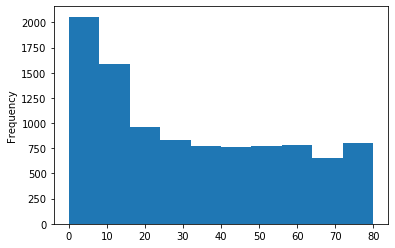

In [13]:
print(nhanes.age.plot(kind='hist'))

AxesSubplot(0.125,0.125;0.775x0.755)


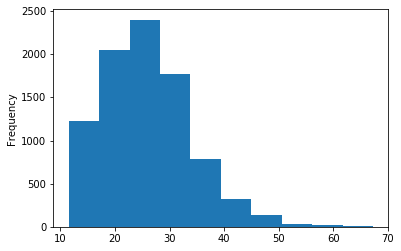

In [14]:
print(nhanes.bmi.plot(kind='hist'))


AxesSubplot(0.125,0.125;0.775x0.755)


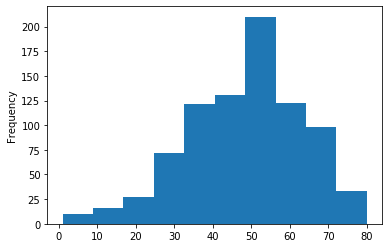

In [15]:
print(nhanes.age_diabetic.plot(kind='hist'))

AxesSubplot(0.125,0.125;0.775x0.755)


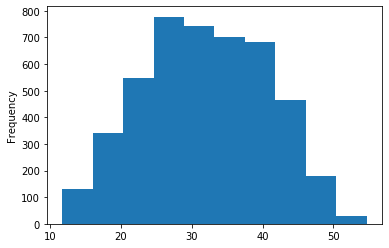

In [16]:
print(nhanes.bodyfatpct.plot(kind='hist'))


AxesSubplot(0.125,0.125;0.775x0.755)


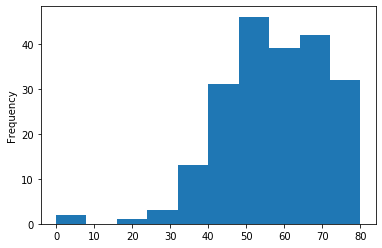

In [17]:
print(nhanes.chf_age.plot(kind='hist'))

AxesSubplot(0.125,0.125;0.775x0.755)


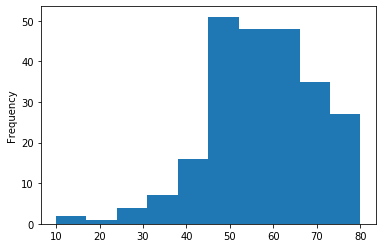

In [18]:
print(nhanes.chd_age.plot(kind='hist'))


AxesSubplot(0.125,0.125;0.775x0.755)


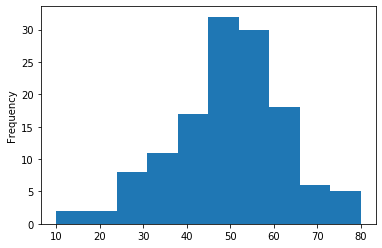

In [19]:
print(nhanes.angina_age.plot(kind='hist'))


AxesSubplot(0.125,0.125;0.775x0.755)


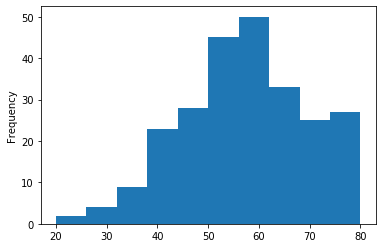

In [20]:
print(nhanes.heartattack_age.plot(kind='hist'))


AxesSubplot(0.125,0.125;0.775x0.755)


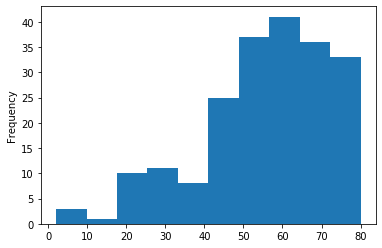

In [21]:
print(nhanes.stroke_age.plot(kind='hist'))


AxesSubplot(0.125,0.125;0.775x0.755)


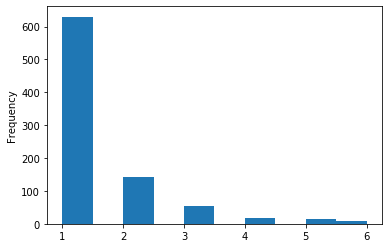

In [22]:
print(nhanes.numhosp.plot(kind='hist'))

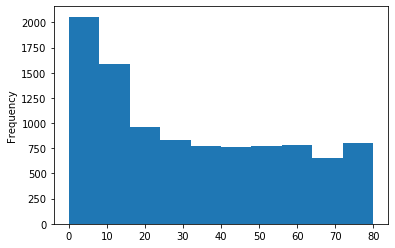

In [23]:
nhanes.age.plot(kind='hist')

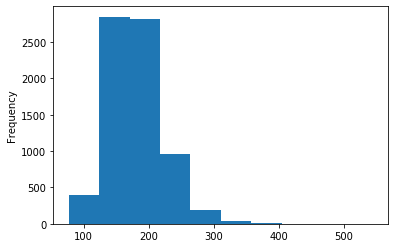

In [24]:
nhanes.tchol.plot(kind='hist')

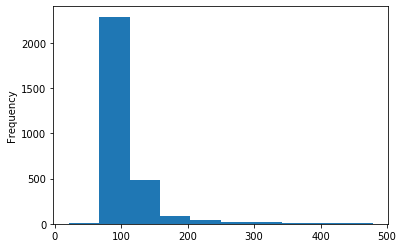

In [25]:
nhanes.glucose.plot(kind='hist')

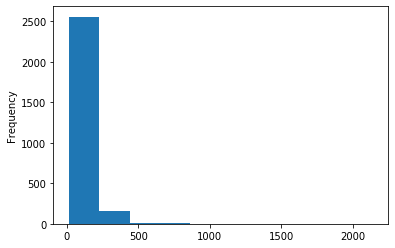

In [26]:
nhanes.tg.plot(kind='hist')

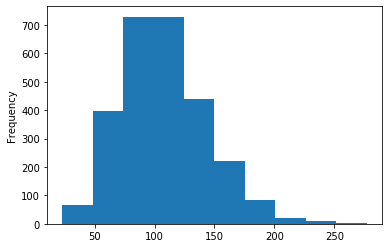

In [27]:
nhanes.ldl.plot(kind='hist')

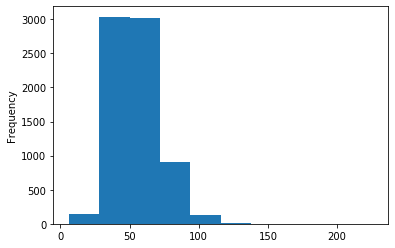

In [28]:
nhanes.hdl.plot(kind='hist')

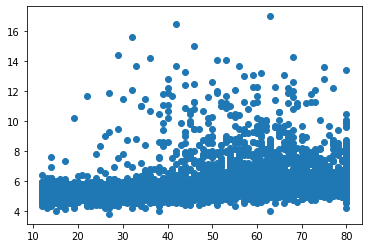

In [29]:
# Hemoglobin A1C by age
plt.scatter(nhanes.age, nhanes.hgba1c)

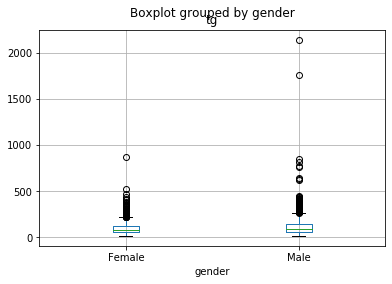

In [30]:
# Triglyceride levels by gender
nhanes.boxplot(column='tg', by='gender')

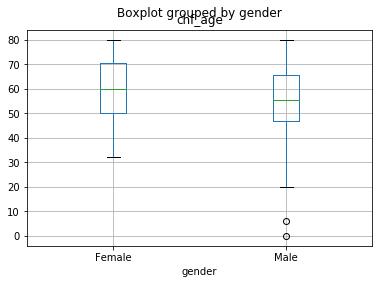

In [31]:
#Looking at Age of onset of CHF by gender
nhanes.boxplot(column='chf_age', by='gender')
plt.show()

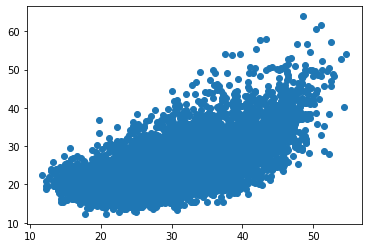

In [32]:
#Comparing bodyfatp percentage to BMI
plt.scatter(nhanes.bodyfatpct, nhanes.bmi)

In [33]:
# Looking at NHANES data only for participants over age of 19 years.
over19 = nhanes.loc[nhanes['age'] >19]
print(over19)

         seqn   age  gender  ethnicity  lang_hisp  lang_nhb_nhw  lang_asian  \
0     83732.0  62.0    Male        3.0        NaN           1.0         NaN   
1     83733.0  53.0    Male        3.0        NaN           NaN         NaN   
2     83734.0  78.0    Male        3.0        NaN           1.0         NaN   
3     83735.0  56.0  Female        3.0        NaN           1.0         NaN   
4     83736.0  42.0  Female        4.0        NaN           1.0         NaN   
...       ...   ...     ...        ...        ...           ...         ...   
8984  93695.0  76.0  Female        3.0        NaN           1.0         NaN   
8985  93696.0  26.0    Male        3.0        NaN           1.0         NaN   
8986  93697.0  80.0  Female        3.0        NaN           1.0         NaN   
8988  93700.0  35.0    Male        3.0        NaN           NaN         NaN   
8990  93702.0  24.0  Female        3.0        NaN           1.0         NaN   

       bmi  diabetic  age_diabetic  prediabetic  de